In [ ]:
%tensorflow_version 2.x
import pandas as pd
import tensorflow as tf 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('fivethirtyeight')
import numpy as n
from PIL import Image
from tensorflow import data 

import os
import numpy as np
import pathlib
import random
from datascience import *

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# 
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

## file id is obtained by entering the share settings of a file

file_id = '1IdNeYOHputshR8AImklK0sVpYq8fTsGP'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("open3feetbig.csv")

file_id = '1ctGq5K29SN40eErcf41s_kgsIR2RES7F'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("open9feetbig.csv")

file_id = '1c-70tU3y-woB61BqEmw6pM6cpVnEZoYR'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("wall3feetbig.csv")

file_id = '1yFC9ZIo-XQ2UzeTKeL6hZJXYKof5k40u'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("wall9feetbig.csv")

file_id = '1-VsVPe80CNFzaLro1juJ2wACQ9d7H0IW'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("open6feet.csv")

In [ ]:
open6 = pd.read_csv("open6feet.csv")
open6

,SCAN,ADDRESS,TIMESTAMP,UUID,MAJOR,MINOR,TX POWER,RSSI
0,0,DC:A6:32:33:AA:02,2020-07-20 19:07:18.248734,e4e51ec8-caf6-11ea-97a0-dca63233aa01,1,1,1,-58
1,1,DC:A6:32:33:AA:02,2020-07-20 19:07:19.102543,e4e51ec8-caf6-11ea-97a0-dca63233aa01,1,1,1,-66
2,2,DC:A6:32:33:AA:02,2020-07-20 19:07:20.773993,e4e51ec8-caf6-11ea-97a0-dca63233aa01,1,1,1,-59
3,3,DC:A6:32:33:AA:02,2020-07-20 19:07:21.037601,e4e51ec8-caf6-11ea-97a0-dca63233aa01,1,1,1,-66
4,4,DC:A6:32:33:AA:02,2020-07-20 19:07:22.237688,e4e51ec8-caf6-11ea-97a0-dca63233aa01,1,1,1,-65
...,...,...,...,...,...,...,...,...
645,645,DC:A6:32:33:AA:02,2020-07-20 19:18:24.044584,e4e51ec8-caf6-11ea-97a0-dca63233aa01,1,1,1,-56
646,646,DC:A6:32:33:AA:02,2020-07-20 19:18:25.105813,e4e51ec8-caf6-11ea-97a0-dca63233aa01,1,1,1,-64
647,647,DC:A6:32:33:AA:02,2020-07-20 19:18:26.088186,e4e51ec8-caf6-11ea-97a0-dca63233aa01,1,1,1,-64
648,648,DC:A6:32:33:AA:02,2020-07-20 19:18:27.010648,e4e51ec8-caf6-11ea-97a0-dca63233aa01,1,1,1,-58


In [ ]:
bins = np.arange(-80,-50,0.35)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e44d58048>]],
      dtype=object)

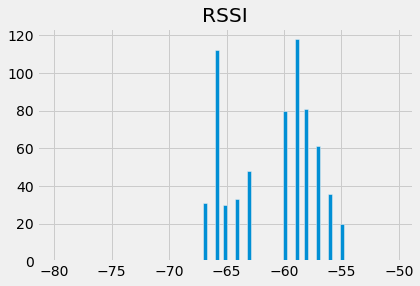

In [ ]:
open6.hist(column="RSSI", bins=bins)

In [ ]:
open6['RSSI'].mean()

-60.93538461538461

In [ ]:
## any rssi value that is less than -67 is farther than 6 feet or equal to 6 feet
threshold = open6['RSSI'].min()
threshold

-67

In [ ]:
open3feet = pd.read_csv("open3feetbig.csv")
open9feet = pd.read_csv("open9feetbig.csv")
wall3feet = pd.read_csv("wall3feetbig.csv")
wall9feet = pd.read_csv("wall9feetbig.csv")
rssi_data = pd.DataFrame(data = {"open3feet" : open3feet["RSSI"],
                                 "open9feet" : open9feet["RSSI"],
                                 "wall3feet" : wall3feet["RSSI"],
                                 "wall9feet" : wall9feet["RSSI"]})
rssi_data

,open3feet,open9feet,wall3feet,wall9feet
0,-58,-65.0,-65.0,-74.0
1,-59,-65.0,-66.0,-73.0
2,-58,-66.0,-65.0,-74.0
3,-57,-65.0,-68.0,-73.0
4,-58,-59.0,-63.0,-80.0
...,...,...,...,...
636,-65,NaN,NaN,NaN
637,-64,NaN,NaN,NaN
638,-65,NaN,NaN,NaN
639,-65,NaN,NaN,NaN


In [ ]:
rssi_data500 = rssi_data.iloc[:500]
rssi_data500

,open3feet,open9feet,wall3feet,wall9feet
0,-58,-65.0,-65.0,-74.0
1,-59,-65.0,-66.0,-73.0
2,-58,-66.0,-65.0,-74.0
3,-57,-65.0,-68.0,-73.0
4,-58,-59.0,-63.0,-80.0
...,...,...,...,...
495,-65,-59.0,-63.0,-72.0
496,-58,-65.0,-64.0,-74.0
497,-58,-65.0,-67.0,-74.0
498,-56,-65.0,-64.0,-75.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e449cbb70>]],
      dtype=object)

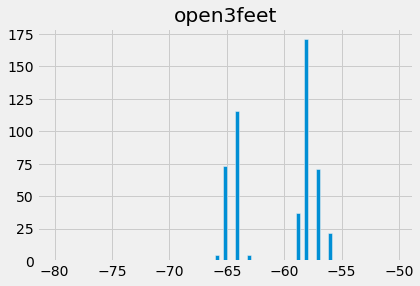

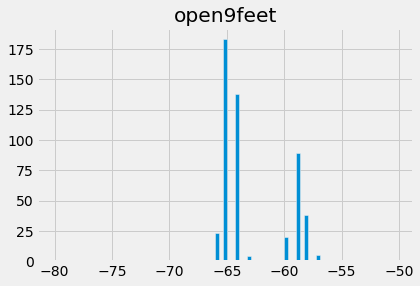

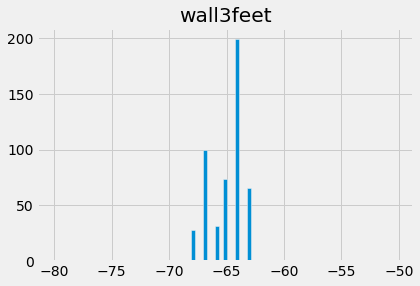

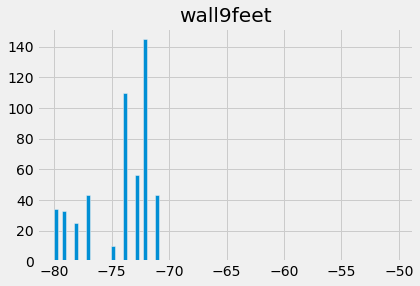

In [ ]:
rssi_data500[['open3feet']].hist(bins=bins)
rssi_data500[['open9feet']].hist(bins=bins)
rssi_data500[['wall3feet']].hist(bins=bins)
rssi_data500[['wall9feet']].hist(bins=bins)

In [ ]:
#start here
#bootstrapping all datas for more variability hoping to find distinguishments
open3 = []
open9 = []
wall3 = []
wall9 = []

for i in range(100):
  bootstrapsample = rssi_data500[['open3feet']].sample(n=500, replace=True)['open3feet']
  open3.extend(bootstrapsample)

  bootstrapsample = rssi_data500[['open9feet']].sample(n=500, replace=True)['open9feet']
  open9.extend(bootstrapsample)

  bootstrapsample = rssi_data500[['wall3feet']].sample(n=500, replace=True)['wall3feet']
  wall3.extend(bootstrapsample)

  bootstrapsample = rssi_data500[['wall9feet']].sample(n=500, replace=True)['wall9feet']
  wall9.extend(bootstrapsample)


  



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e43f74ba8>]],
      dtype=object)

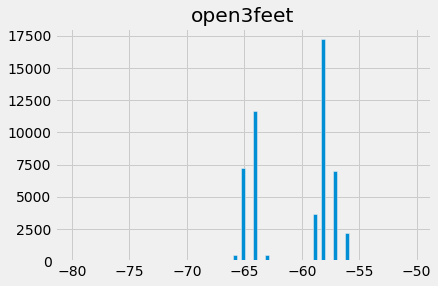

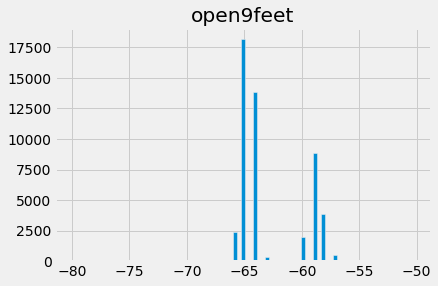

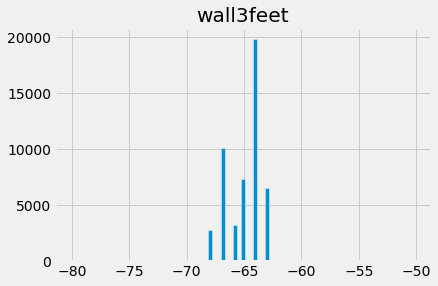

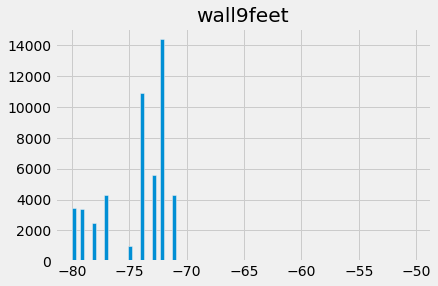

In [ ]:
##distributions
bootstrapdata = pd.DataFrame({"open3feet": open3,"open9feet":open9, "wall3feet": wall3, "wall9feet":wall9})
bootstrapdata[['open3feet']].hist(bins=bins)
bootstrapdata[['open9feet']].hist(bins=bins)
bootstrapdata[['wall3feet']].hist(bins=bins)
bootstrapdata[['wall9feet']].hist(bins=bins)

In [ ]:
n_data = 50000
#takes pd series and return the combined series
#below6feet is class 1, above 6 feet is class 0 


below6 = bootstrapdata["open3feet"].values.tolist()
below6labels = [1] * n_data

above6 = []
extend9 = bootstrapdata["open9feet"].values.tolist()
extendwall3 = bootstrapdata["wall3feet"].values.tolist()
extendwall9 = bootstrapdata["wall9feet"].values.tolist()
above6.extend(extend9)
above6.extend(extendwall3)
above6.extend(extendwall9)
above6labels = [0] * n_data * 3




print(below6)
print(below6labels)
print(above6)
print(above6labels)

[-57, -58, -58, -65, -58, -64, -64, -58, -64, -58, -56, -65, -57, -59, -59, -65, -58, -58, -57, -56, -56, -58, -57, -65, -59, -58, -57, -58, -65, -66, -65, -65, -58, -64, -59, -63, -65, -58, -64, -58, -58, -58, -58, -64, -59, -58, -57, -58, -58, -57, -58, -58, -58, -58, -56, -65, -65, -64, -64, -59, -56, -58, -58, -58, -65, -58, -58, -58, -56, -58, -65, -66, -56, -58, -65, -58, -58, -58, -63, -58, -58, -59, -64, -58, -64, -64, -57, -65, -64, -57, -64, -66, -57, -64, -65, -59, -58, -64, -65, -58, -65, -58, -64, -58, -59, -59, -64, -58, -58, -64, -57, -57, -64, -64, -65, -58, -65, -59, -57, -65, -57, -64, -58, -58, -58, -58, -65, -65, -58, -64, -57, -58, -65, -57, -58, -58, -64, -57, -65, -65, -58, -57, -57, -58, -57, -58, -58, -64, -65, -58, -57, -64, -58, -64, -57, -64, -64, -59, -64, -59, -58, -57, -65, -58, -65, -58, -64, -58, -59, -58, -58, -58, -65, -64, -58, -59, -58, -57, -57, -64, -58, -64, -56, -59, -59, -58, -58, -65, -64, -65, -57, -56, -59, -57, -58, -58, -64, -58, -58, -58,

In [ ]:
##verifying lengths
print(len(below6))
print(len(above6))

50000
150000


In [ ]:
##combining data and shuffling

data = []
data.extend(below6)
data.extend(above6)

datalabels = []
datalabels.extend(below6labels)
datalabels.extend(above6labels)

df = pd.DataFrame({'RSSI': data,
                          "target":datalabels})

shuffleddf = df.sample(frac=1)



In [ ]:
## make predictions and put next to data
estimates = shuffleddf['RSSI'] < threshold
shuffleddf["Threshold based Estimates"] = estimates
shuffleddf

,RSSI,target,Threshold based Estimates
152997,-72.0,0,True
137884,-64.0,0,False
28827,-57.0,1,False
39499,-58.0,1,False
116011,-67.0,0,False
...,...,...,...
52447,-66.0,0,False
9469,-58.0,1,False
66416,-65.0,0,False
161033,-79.0,0,True


In [ ]:
condition = shuffleddf['Threshold based Estimates'] == True
condition

152997     True
137884    False
28827     False
39499     False
116011    False
          ...  
52447     False
9469      False
66416     False
161033     True
109290    False
Name: Threshold based Estimates, Length: 200000, dtype: bool

In [ ]:
## filtering out only the data points that were disregarded based on the threshold
onlyDisregarded = shuffleddf[condition]
onlyDisregarded

,RSSI,target,Threshold based Estimates
152997,-72.0,0,True
169281,-71.0,0,True
178281,-72.0,0,True
162148,-71.0,0,True
179931,-72.0,0,True
...,...,...,...
191701,-80.0,0,True
155696,-71.0,0,True
162916,-79.0,0,True
174981,-77.0,0,True


In [ ]:
#renaming columns
onlyDisregarded.columns = ['RSSI', 'target', 'Below Threshold']
onlyDisregarded

,RSSI,target,Below Threshold
152997,-72.0,0,True
169281,-71.0,0,True
178281,-72.0,0,True
162148,-71.0,0,True
179931,-72.0,0,True
...,...,...,...
191701,-80.0,0,True
155696,-71.0,0,True
162916,-79.0,0,True
174981,-77.0,0,True


In [ ]:
#amount of data that was correctly disregarded
correct = onlyDisregarded[['target','Below Threshold']].groupby(['target']).count()
correct

,Below Threshold
target,
0,52909


In [ ]:
## with the data that we collected, this method was effective in disregarding data from the start as it achieved 0 errors
accuracy = correct['Below Threshold'][0]/ len(onlyDisregarded) * 100
accuracy

100.0